In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/Covid-19 Datasets/covid_19_data.csv")
openlist=pd.read_csv("Downloads/Covid-19 Datasets/COVID19_open_line_list.csv")
linelist=pd.read_csv("Downloads/Covid-19 Datasets/COVID19_line_list_data.csv")
conf=pd.read_csv("Downloads/Covid-19 Datasets/time_series_covid_19_confirmed.csv")
confus=pd.read_csv("Downloads/Covid-19 Datasets/time_series_covid_19_confirmed_US.csv")
death=pd.read_csv("Downloads/Covid-19 Datasets/time_series_covid_19_deaths.csv")
deathus=pd.read_csv("Downloads/Covid-19 Datasets/time_series_covid_19_deaths_US.csv")
recovered=pd.read_csv("Downloads/Covid-19 Datasets/time_series_covid_19_recovered.csv")

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
linelist.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


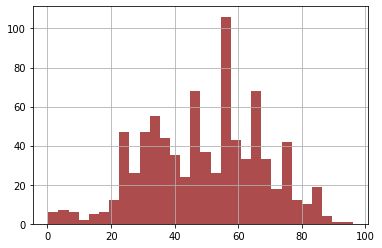

In [5]:
linelist['age'].hist(bins=30,color='darkred',alpha=0.7)

In [6]:
confus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 101 entries, UID to 4/20/20
dtypes: float64(3), int64(92), object(6)
memory usage: 2.5+ MB


In [7]:
conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24


In [30]:
# renaming the df column names to lowercase
conf.columns = map(str.lower, conf.columns)
death.columns = map(str.lower, death.columns)
recovered.columns = map(str.lower, recovered.columns)
df.columns = map(str.lower, df.columns)

# changing province/state to state and country/region to country
conf = conf.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered = recovered.rename(columns={'province/state': 'state', 'country/region': 'country'})
death = death.rename(columns={'province/state': 'state', 'country/region': 'country'})
df = df.rename(columns={'Country/region': 'Country'})

In [9]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [conf, death]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

In [19]:
from datetime import datetime
df1=conf.columns
df1=df1.to_list()
del df1[0:4]
time = [];value = [];
col_value = df1
for i in df1:
    time.append(datetime.strptime(i, '%m/%d/%y'))
    value.append(conf[i].sum())
df2= pd.DataFrame({'Time':time,'impact':value})

TypeError: ufunc multiply cannot use operands with types dtype('<M8[ns]') and dtype('float64')

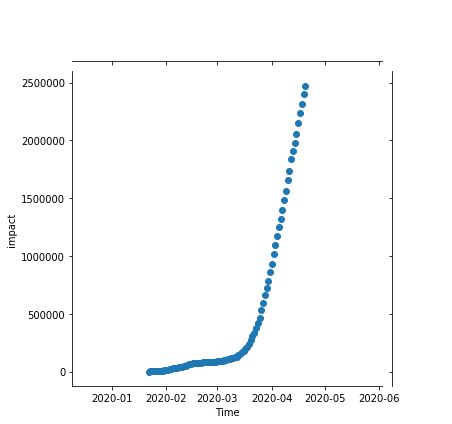

In [21]:
sns.jointplot(x='Time',y='impact',data=df2)

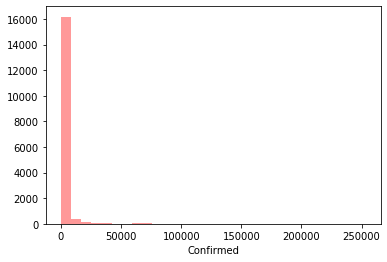

In [22]:
sns.distplot(df['Confirmed'],bins=30,kde=False,color='red')

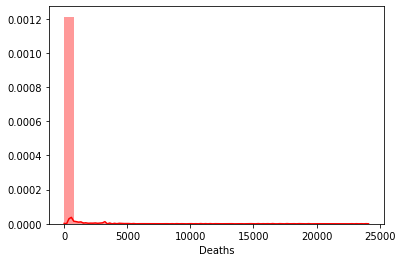

In [25]:
sns.distplot(df['Deaths'],bins=30,kde=True,color='red')

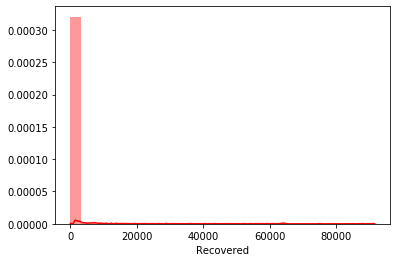

In [26]:
sns.distplot(df['Recovered'],bins=30,kde=True,color='red')

TypeError: invalid type promotion

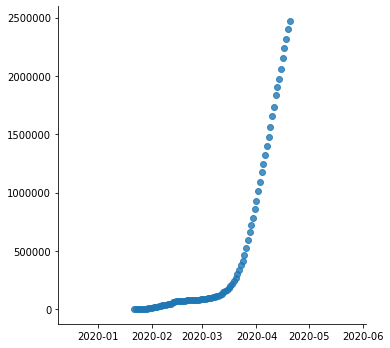

In [27]:
sns.lmplot(data=df2,x="Time",y="impact")

In [28]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [29]:
px.scatter(data_frame=df1,x="Time",y="impact",title="Impact Rate")

NameError: name 'px' is not defined

In [31]:
confc = int(df['confirmed'].sum())
deathc= int(df['deaths'].sum())
recoveredc = int(df['recovered'].sum())

In [32]:
confc

44837934

In [34]:
deathc

2563664

In [35]:
recoveredc

11090169

In [36]:
active=confc-deathc-recoveredc
active

31184101

In [41]:
df3=pd.DataFrame[confc,deathc,recoveredc,active]
sns.boxplot(data=df3,palette='rainbow',orient='h')

TypeError: 'type' object is not subscriptable

In [43]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [44]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return df.sort_values('Confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

NameError: name 'go' is not defined

In [45]:
sorted_country_df =df.sort_values('confirmed', ascending= False)

In [46]:
sorted_country_df

,sno,observationdate,province/state,country/region,last update,confirmed,deaths,recovered
16993,16994,04/20/2020,New York,US,2020-04-20 23:44:50,253060.0,18611.0,0.0
16673,16674,04/19/2020,New York,US,2020-04-19 23:49:05,247815.0,18298.0,0.0
16353,16354,04/18/2020,New York,US,2020-04-18 22:40:18,241712.0,17671.0,0.0
16033,16034,04/17/2020,New York,US,2020-04-17 23:38:48,230597.0,17131.0,0.0
15713,15714,04/16/2020,New York,US,2020-04-16 23:38:19,223691.0,14832.0,0.0
...,...,...,...,...,...,...,...,...
7609,7610,03/21/2020,NaN,Greenland,2020-03-19T09:33:04,0.0,0.0,0.0
7608,7609,03/21/2020,Reunion,France,2020-03-18T14:33:15,0.0,0.0,0.0
7607,7608,03/21/2020,Mayotte,France,2020-03-18T14:33:15,0.0,0.0,0.0
7606,7607,03/21/2020,Guadeloupe,France,2020-03-18T14:33:15,0.0,0.0,0.0
